# **Install kaggle library to download kaggle dataset to collab**

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Downloading Kaggle dataSet**

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 96% 142M/149M [00:01<00:00, 71.7MB/s]
100% 149M/149M [00:02<00:00, 74.4MB/s]


# **Unzip the data set**

In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# **Getting statistical analysis from the data set**

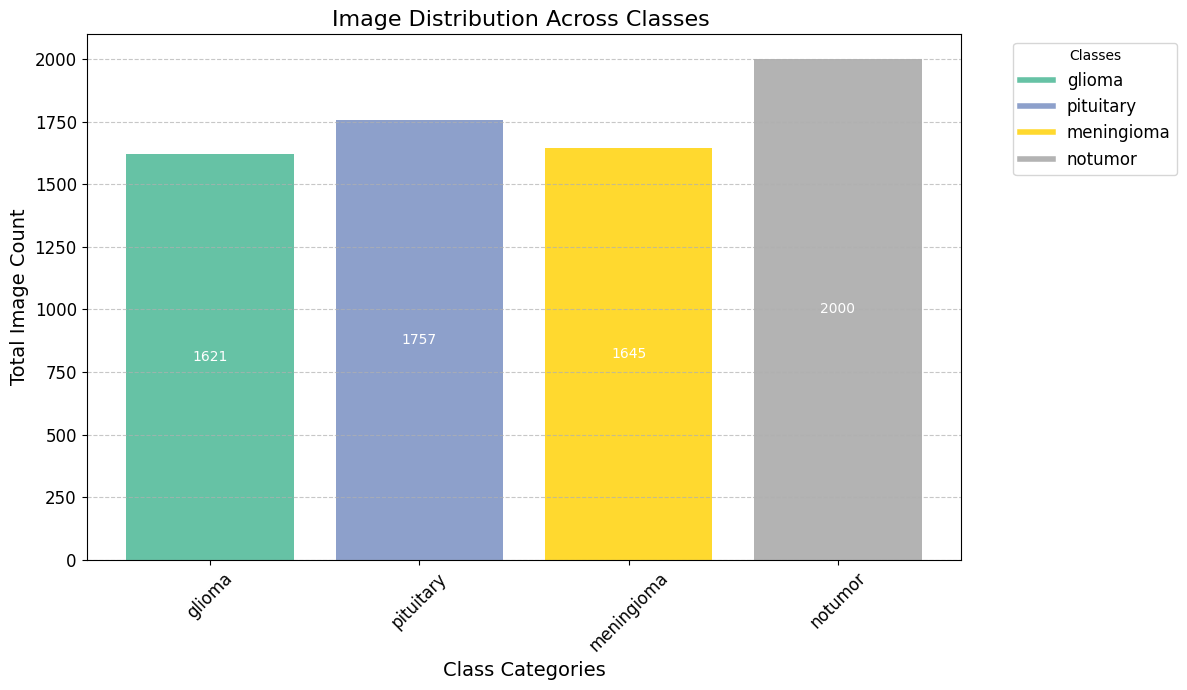

Combined Image Count per Class (Training + Testing):
glioma: 1621
pituitary: 1757
meningioma: 1645
notumor: 2000
Total Images in Training Set: 5712
Total Images in Testing Set: 1311


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define directories for training and testing datasets
train_directory = '/content/Training'
test_directory = '/content/Testing'

# Function to calculate the number of images in each class directory
def get_image_counts(directory):
    class_folders = os.listdir(directory)
    image_counts = {}
    total_images = 0
    for folder in class_folders:
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            image_counts[folder] = num_images
            total_images += num_images
    return image_counts, total_images

# Get counts for training images
training_counts, training_total = get_image_counts(train_directory)

# Get counts for testing images
testing_counts, testing_total = get_image_counts(test_directory)

# Aggregate counts from both training and testing sets
combined_counts = {}
for class_name in training_counts:
    combined_counts[class_name] = training_counts[class_name] + testing_counts.get(class_name, 0)

# Generate a color map
color_map = cm.get_cmap('Set2', len(combined_counts))  # Changed color map to 'Set2'

# Plotting the results
plt.figure(figsize=(12, 7))
bars = plt.bar(combined_counts.keys(), combined_counts.values(), color=[color_map(i) for i in range(len(combined_counts))])

# Customize the plot appearance
plt.xlabel('Class Categories', fontsize=14)
plt.ylabel('Total Image Count', fontsize=14)
plt.title('Image Distribution Across Classes ', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, int(height), ha='center', va='center', fontsize=10, color='white')

# Create a custom legend with updated title
legend_labels = combined_counts.keys()
legend_colors = [color_map(i) for i in range(len(combined_counts))]
legend_elements = [plt.Line2D([0], [0], color=legend_colors[i], lw=4) for i in range(len(legend_labels))]
plt.legend(legend_elements, legend_labels, title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

# Output total image counts for each class
print("Combined Image Count per Class (Training + Testing):")
for class_name, count in combined_counts.items():
    print(f"{class_name}: {count}")

# Output total image counts for training and testing sets
print(f"Total Images in Training Set: {training_total}")
print(f"Total Images in Testing Set: {testing_total}")


# **plotting single image from the Training data set**

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/content/Training"


# Define the list of label folders in the dataset folder
label_folders = ['glioma','meningioma','notumor','pituitary']

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Create a dictionary to map label folders to numerical labels
label_mapping = {label: idx for idx, label in enumerate(label_folders)}

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)

    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its numerical label to the data and labels lists
        data.append(img)
        labels.append(label_mapping[label_folder])

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels, num_classes=len(label_folders))

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
label_mapping

Data shape: (5712, 128, 128, 3)
Labels shape: (5712,)


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [ ]:
labels

array([0, 0, 0, ..., 3, 3, 3])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
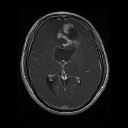

In [ ]:
data[0]

# **Simple CNN model**

# **Load the dataset from the folder and split it into training and testing**

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the path to the dataset folders
train_dataset_path = "/content/Training"
test_dataset_path = "/content/Testing"

# Define the list of label folders in the dataset folder
label_folders = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the size of the input images
img_height = 128
img_width = 128

# Function to load and preprocess images from a given path
def load_data(dataset_path, label_folders):
    data = []
    labels = []
    label_mapping = {label: idx for idx, label in enumerate(label_folders)}

    for label_folder in label_folders:
        label_path = os.path.join(dataset_path, label_folder)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_height, img_width))
            data.append(img)
            labels.append(label_mapping[label_folder])

    data = np.array(data)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=len(label_folders))

    return data, labels

# Load and preprocess training data
train_data, train_labels = load_data(train_dataset_path, label_folders)
# Load and preprocess testing data
test_data, test_labels = load_data(test_dataset_path, label_folders)


# **Model Creation**

In [ ]:

# Define the model creation function
def create_simple_neural_network(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Example input shape (adjust based on your image dimensions and channels)
input_shape = (128, 128, 3)

# Example number of classes (adjust based on your dataset)
num_classes = 4


# **comppile fit and evalution of CNN model**

In [ ]:

# Create the simplified neural network model
simple_neural_network = create_simple_neural_network(input_shape, num_classes)

# Display the model summary
simple_neural_network.summary()

# Compile the model
simple_neural_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = simple_neural_network.fit(train_data, train_labels, epochs=30, validation_split=0.1)

# Evaluate the model performance on the testing dataset
test_loss, test_accuracy = simple_neural_network.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

# **plot  classification report confusion matrix and history graph**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

41/41 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

      glioma       0.99      0.94      0.96       300
  meningioma       0.93      0.94      0.94       306
     notumor       0.97      1.00      0.98       405
   pituitary       0.99      0.98      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



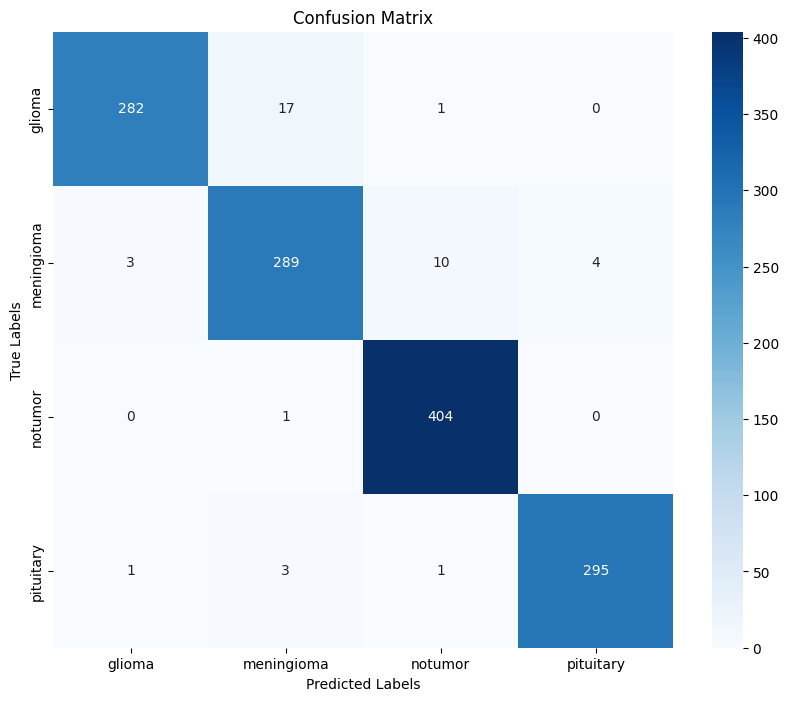

In [ ]:
# Predict the labels for the test data
test_predictions = simple_neural_network.predict(test_data)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Generate the classification report
report = classification_report(test_true_classes, test_predictions_classes, target_names=label_folders)
print(report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_predictions_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_folders, yticklabels=label_folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

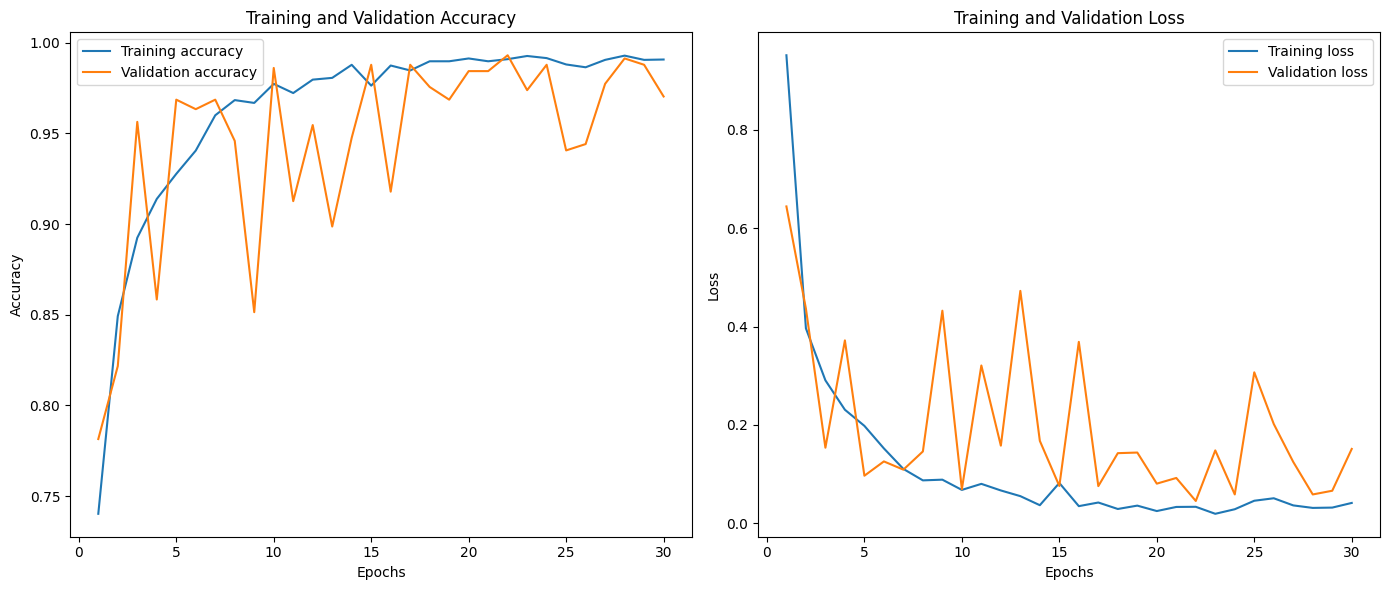

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, '-', label='Training accuracy')
plt.plot(epochs, val_accuracy, '-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
